<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_Neural_Network_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Creating code to determine the initial values of the weights.**

In [2]:
import numpy as np

# Defining the number of nodes for each layer
n_features = 784  # Input layer
n_nodes1 = 400  # Hidden layer 1
n_nodes2 = 200  # Hidden layer 2
n_output = 10  # Output layer

# Setting the standard deviation for the Gaussian distribution
sigma = 0.01

# Initializing weights for each layer
W1 = sigma * np.random.randn(n_features, n_nodes1)
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
W3 = sigma * np.random.randn(n_nodes2, n_output)

# Initializing biases for each layer with zeros
B1 = np.zeros(n_nodes1)
B2 = np.zeros(n_nodes2)
B3 = np.zeros(n_output)

# Printing the shapes to confirm
print("Shape of W1:", W1.shape)
print("Shape of B1:", B1.shape)
print("Shape of W2:", W2.shape)
print("Shape of B2:", B2.shape)
print("Shape of W3:", W3.shape)
print("Shape of B3:", B3.shape)

Shape of W1: (784, 400)
Shape of B1: (400,)
Shape of W2: (400, 200)
Shape of B2: (200,)
Shape of W3: (200, 10)
Shape of B3: (10,)


**2. Implementation of Forward Propagation**

In [4]:
import numpy as np

class ScratchSimpleNeuralNetrowkClassifier:
    """
    Simple three-layer neural network classifier

    Parameters
    ----------
    verbose : bool
        If True, the learning process will be output.

    Attributes
    ----------
    W1 : numpy.ndarray, shape (n_features, n_nodes1)
        Weights for the first layer.
    B1 : numpy.ndarray, shape (n_nodes1,)
        Bias for the first layer.
    W2 : numpy.ndarray, shape (n_nodes1, n_nodes2)
        Weights for the second layer.
    B2 : numpy.ndarray, shape (n_nodes2,)
        Bias for the second layer.
    W3 : numpy.ndarray, shape (n_nodes2, n_output)
        Weights for the third layer.
    B3 : numpy.ndarray, shape (n_output,)
        Bias for the third layer.
    """

    def __init__(self, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, verbose=True):
        self.verbose = verbose
        # Initializing weights and biases with a Gaussian distribution
        # Weights
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)
        # Biases are initialized to zeros
        self.B1 = np.zeros(n_nodes1)
        self.B2 = np.zeros(n_nodes2)
        self.B3 = np.zeros(n_output)

        if self.verbose:
            print("Model parameters initialized:")
            print(f"W1 shape: {self.W1.shape}")
            print(f"B1 shape: {self.B1.shape}")
            print(f"W2 shape: {self.W2.shape}")
            print(f"B2 shape: {self.B2.shape}")
            print(f"W3 shape: {self.W3.shape}")
            print(f"B3 shape: {self.B3.shape}")

    def _sigmoid(self, A):
        """
        Sigmoid activation function.
        f(A) = 1 / (1 + exp(-A))

        Parameters
        ----------
        A : numpy.ndarray
            Input array.

        Returns
        -------
        numpy.ndarray
            Output array after applying the sigmoid function.
        """
        return 1 / (1 + np.exp(-A))

    def _softmax(self, A):
        """
        Softmax activation function, with stability consideration.
        Z_k = exp(A_k) / sum(exp(A_i))

        Parameters
        ----------
        A : numpy.ndarray, shape (batch_size, n_output)
            Input array.

        Returns
        -------
        numpy.ndarray, shape (batch_size, n_output)
            Output array of probabilities.
        """
        # Subtracting max for numerical stability to prevent overflow
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        return exp_A / np.sum(exp_A, axis=1, keepdims=True)

    def forward_propagation(self, X):
        """
        Performs forward propagation through the three-layer network.

        Parameters
        ----------
        X : numpy.ndarray, shape (n_samples, n_features)
            Input data.

        Returns
        -------
        Z3 : numpy.ndarray, shape (n_samples, n_output)
            Probabilities for each class.
        """
        # First layer
        # A1 = X * W1 + B1
        A1 = X @ self.W1 + self.B1
        # Z1 = sigmoid(A1)
        Z1 = self._sigmoid(A1)

        # Second layer
        # A2 = Z1 * W2 + B2
        A2 = Z1 @ self.W2 + self.B2
        # Z2 = sigmoid(A2)
        Z2 = self._sigmoid(A2)

        # Third layer (output layer)
        # A3 = Z2 * W3 + B3
        A3 = Z2 @ self.W3 + self.B3
        # Z3 = softmax(A3)
        Z3 = self._softmax(A3)

        # Returning the intermediate values as a tuple to be used later for backpropagation.
        return Z1, Z2, Z3

    def fit(self, X, y, X_val=None, y_val=None):
        # This method will be implemented in later problems.
        pass

    def predict(self, X):
        # This method will be implemented in a later problem.
        # It will use forward propagation and return the predicted class.
        pass

**3. Implementation of Cross-Entropy Error**

In [6]:
import numpy as np

class ScratchSimpleNeuralNetrowkClassifier:
    """
    Simple three-layer neural network classifier

    Parameters
    ----------
    verbose : bool
        If True, the learning process will be output.

    Attributes
    ----------
    W1 : numpy.ndarray, shape (n_features, n_nodes1)
        Weights for the first layer.
    B1 : numpy.ndarray, shape (n_nodes1,)
        Bias for the first layer.
    W2 : numpy.ndarray, shape (n_nodes1, n_nodes2)
        Weights for the second layer.
    B2 : numpy.ndarray, shape (n_nodes2,)
        Bias for the second layer.
    W3 : numpy.ndarray, shape (n_nodes2, n_output)
        Weights for the third layer.
    B3 : numpy.ndarray, shape (n_output,)
        Bias for the third layer.
    """

    def __init__(self, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, verbose=True):
        self.verbose = verbose
        # Initializing weights and biases with a Gaussian distribution
        # Weights
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)
        # Biases are initialized to zeros
        self.B1 = np.zeros(n_nodes1)
        self.B2 = np.zeros(n_nodes2)
        self.B3 = np.zeros(n_output)

        if self.verbose:
            print("Model parameters initialized:")
            print(f"W1 shape: {self.W1.shape}")
            print(f"B1 shape: {self.B1.shape}")
            print(f"W2 shape: {self.W2.shape}")
            print(f"B2 shape: {self.B2.shape}")
            print(f"W3 shape: {self.W3.shape}")
            print(f"B3 shape: {self.B3.shape}")

    def _sigmoid(self, A):
        """
        Sigmoid activation function.
        f(A) = 1 / (1 + exp(-A))

        Parameters
        ----------
        A : numpy.ndarray
            Input array.

        Returns
        -------
        numpy.ndarray
            Output array after applying the sigmoid function.
        """
        return 1 / (1 + np.exp(-A))

    def _softmax(self, A):
        """
        Softmax activation function, with stability consideration.
        Z_k = exp(A_k) / sum(exp(A_i))

        Parameters
        ----------
        A : numpy.ndarray, shape (batch_size, n_output)
            Input array.

        Returns
        -------
        numpy.ndarray, shape (batch_size, n_output)
            Output array of probabilities.
        """
        # Subtracting max for numerical stability to prevent overflow
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        return exp_A / np.sum(exp_A, axis=1, keepdims=True)

    def forward_propagation(self, X):
        """
        Performs forward propagation through the three-layer network.

        Parameters
        ----------
        X : numpy.ndarray, shape (n_samples, n_features)
            Input data.

        Returns
        -------
        Z3 : numpy.ndarray, shape (n_samples, n_output)
            Probabilities for each class.
        """
        # First layer
        # A1 = X * W1 + B1
        A1 = X @ self.W1 + self.B1
        # Z1 = sigmoid(A1)
        Z1 = self._sigmoid(A1)

        # Second layer
        # A2 = Z1 * W2 + B2
        A2 = Z1 @ self.W2 + self.B2
        # Z2 = sigmoid(A2)
        Z2 = self._sigmoid(A2)

        # Third layer (output layer)
        # A3 = Z2 * W3 + B3
        A3 = Z2 @ self.W3 + self.B3
        # Z3 = softmax(A3)
        Z3 = self._softmax(A3)

        # Returning the intermediate values as a tuple to be used for backpropagation later.
        return Z1, Z2, Z3

    def _cross_entropy_error(self, Z3, y_true):
        """
        Calculates the cross-entropy error.

        Parameters
        ----------
        Z3 : numpy.ndarray, shape (n_samples, n_output)
            Predicted probabilities from the output layer.
        y_true : numpy.ndarray, shape (n_samples, n_output)
            One-hot encoded true labels.

        Returns
        -------
        L : float
            The cross-entropy error.
        """
        batch_size = Z3.shape[0]
        # Adding a small value to Z3 to avoid log(0)
        L = -np.sum(y_true * np.log(Z3 + 1e-7)) / batch_size
        return L

    def fit(self, X, y, X_val=None, y_val=None):
        # This method will be implemented in later problems.
        pass

    def predict(self, X):
        # This method will be implemented in a later problem.
        # It will use forward propagation and return the predicted class.
        pass

**4. Back-propagation implementation**

In [7]:
import numpy as np

class ScratchSimpleNeuralNetrowkClassifier:
    """
    Simple three-layer neural network classifier

    Parameters
    ----------
    verbose : bool
        If True, the learning process will be output.

    Attributes
    ----------
    W1 : numpy.ndarray, shape (n_features, n_nodes1)
        Weights for the first layer.
    B1 : numpy.ndarray, shape (n_nodes1,)
        Bias for the first layer.
    W2 : numpy.ndarray, shape (n_nodes1, n_nodes2)
        Weights for the second layer.
    B2 : numpy.ndarray, shape (n_nodes2,)
        Bias for the second layer.
    W3 : numpy.ndarray, shape (n_nodes2, n_output)
        Weights for the third layer.
    B3 : numpy.ndarray, shape (n_output,)
        Bias for the third layer.
    learning_rate : float
        The learning rate for weight updates.
    """

    def __init__(self, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, learning_rate=0.01, verbose=True):
        self.verbose = verbose
        self.learning_rate = learning_rate
        # Initializing weights and biases with a Gaussian distribution
        # Weights
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)
        # Biases are initialized to zeros
        self.B1 = np.zeros(n_nodes1)
        self.B2 = np.zeros(n_nodes2)
        self.B3 = np.zeros(n_output)

        if self.verbose:
            print("Model parameters initialized:")
            print(f"W1 shape: {self.W1.shape}")
            print(f"B1 shape: {self.B1.shape}")
            print(f"W2 shape: {self.W2.shape}")
            print(f"B2 shape: {self.B2.shape}")
            print(f"W3 shape: {self.W3.shape}")
            print(f"B3 shape: {self.B3.shape}")

    def _sigmoid(self, A):
        """
        Sigmoid activation function.
        f(A) = 1 / (1 + exp(-A))

        Parameters
        ----------
        A : numpy.ndarray
            Input array.

        Returns
        -------
        numpy.ndarray
            Output array after applying the sigmoid function.
        """
        return 1 / (1 + np.exp(-A))

    def _softmax(self, A):
        """
        Softmax activation function, with stability consideration.
        Z_k = exp(A_k) / sum(exp(A_i))

        Parameters
        ----------
        A : numpy.ndarray, shape (batch_size, n_output)
            Input array.

        Returns
        -------
        numpy.ndarray, shape (batch_size, n_output)
            Output array of probabilities.
        """
        # Subtracting max for numerical stability to prevent overflow
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        return exp_A / np.sum(exp_A, axis=1, keepdims=True)

    def forward_propagation(self, X):
        """
        Performs forward propagation through the three-layer network.

        Parameters
        ----------
        X : numpy.ndarray, shape (n_samples, n_features)
            Input data.

        Returns
        -------
        A1, Z1, A2, Z2, A3, Z3 : tuple of numpy.ndarray
            Intermediate values from each layer, required for backpropagation.
        """
        # First layer
        # A1 = X * W1 + B1
        A1 = X @ self.W1 + self.B1
        # Z1 = sigmoid(A1)
        Z1 = self._sigmoid(A1)

        # Second layer
        # A2 = Z1 * W2 + B2
        A2 = Z1 @ self.W2 + self.B2
        # Z2 = sigmoid(A2)
        Z2 = self._sigmoid(A2)

        # Third layer (output layer)
        # A3 = Z2 * W3 + B3
        A3 = Z2 @ self.W3 + self.B3
        # Z3 = softmax(A3)
        Z3 = self._softmax(A3)

        return A1, Z1, A2, Z2, A3, Z3

    def _cross_entropy_error(self, Z3, y_true):
        """
        Calculates the cross-entropy error.

        Parameters
        ----------
        Z3 : numpy.ndarray, shape (n_samples, n_output)
            Predicted probabilities from the output layer.
        y_true : numpy.ndarray, shape (n_samples, n_output)
            One-hot encoded true labels.

        Returns
        -------
        L : float
            The cross-entropy error.
        """
        batch_size = Z3.shape[0]
        # Adding a small value to Z3 to avoid log(0)
        L = -np.sum(y_true * np.log(Z3 + 1e-7)) / batch_size
        return L

    def _back_propagation(self, X, y_true, A1, Z1, A2, Z2, A3, Z3):
        """
        Performs backpropagation to calculate and update gradients.

        Parameters
        ----------
        X : numpy.ndarray, shape (n_samples, n_features)
            Input data.
        y_true : numpy.ndarray, shape (n_samples, n_output)
            One-hot encoded true labels.
        A1, Z1, A2, Z2, A3, Z3 : numpy.ndarray
            Intermediate values from forward propagation.
        """
        batch_size = X.shape[0]

        # Third layer (Output)
        # Gradient of loss with respect to A3
        dA3 = (Z3 - y_true) / batch_size

        # Gradient of loss with respect to W3 and B3
        dW3 = Z2.T @ dA3
        dB3 = np.sum(dA3, axis=0)

        # Gradient of loss with respect to Z2
        dZ2 = dA3 @ self.W3.T

        # --- Second layer ---
        # Gradient of loss with respect to A2 (for sigmoid activation)
        dA2 = dZ2 * self._sigmoid(A2) * (1 - self._sigmoid(A2))

        # Gradient of loss with respect to W2 and B2
        dW2 = Z1.T @ dA2
        dB2 = np.sum(dA2, axis=0)

        # Gradient of loss with respect to Z1
        dZ1 = dA2 @ self.W2.T

        # First layer
        # Gradient of loss with respect to A1 (for sigmoid activation)
        dA1 = dZ1 * self._sigmoid(A1) * (1 - self._sigmoid(A1))

        # Gradient of loss with respect to W1 and B1
        dW1 = X.T @ dA1
        dB1 = np.sum(dA1, axis=0)

        # Updating weights and biases
        self.W3 -= self.learning_rate * dW3
        self.B3 -= self.learning_rate * dB3
        self.W2 -= self.learning_rate * dW2
        self.B2 -= self.learning_rate * dB2
        self.W1 -= self.learning_rate * dW1
        self.B1 -= self.learning_rate * dB1

    def fit(self, X, y, X_val=None, y_val=None):
        # This method will be implemented in later problems.
        # It will use forward and backpropagation for training.
        pass

    def predict(self, X):
        # This method will be implemented in a later problem.
        # It will use forward propagation and return the predicted class.
        pass

**5. Estimation**

In [8]:
import numpy as np

class ScratchSimpleNeuralNetrowkClassifier:
    """
    Simple three-layer neural network classifier

    Parameters
    ----------
    verbose : bool
        If True, the learning process will be output.

    Attributes
    ----------
    W1 : numpy.ndarray, shape (n_features, n_nodes1)
        Weights for the first layer.
    B1 : numpy.ndarray, shape (n_nodes1,)
        Bias for the first layer.
    W2 : numpy.ndarray, shape (n_nodes1, n_nodes2)
        Weights for the second layer.
    B2 : numpy.ndarray, shape (n_nodes2,)
        Bias for the second layer.
    W3 : numpy.ndarray, shape (n_nodes2, n_output)
        Weights for the third layer.
    B3 : numpy.ndarray, shape (n_output,)
        Bias for the third layer.
    learning_rate : float
        The learning rate for weight updates.
    """

    def __init__(self, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, learning_rate=0.01, verbose=True):
        self.verbose = verbose
        self.learning_rate = learning_rate
        # Initializing weights and biases with a Gaussian distribution
        # Weights
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)
        # Biases are initialized to zeros
        self.B1 = np.zeros(n_nodes1)
        self.B2 = np.zeros(n_nodes2)
        self.B3 = np.zeros(n_output)

        if self.verbose:
            print("Model parameters initialized:")
            print(f"W1 shape: {self.W1.shape}")
            print(f"B1 shape: {self.B1.shape}")
            print(f"W2 shape: {self.W2.shape}")
            print(f"B2 shape: {self.B2.shape}")
            print(f"W3 shape: {self.W3.shape}")
            print(f"B3 shape: {self.B3.shape}")

    def _sigmoid(self, A):
        """
        Sigmoid activation function.
        f(A) = 1 / (1 + exp(-A))

        Parameters
        ----------
        A : numpy.ndarray
            Input array.

        Returns
        -------
        numpy.ndarray
            Output array after applying the sigmoid function.
        """
        return 1 / (1 + np.exp(-A))

    def _softmax(self, A):
        """
        Softmax activation function, with stability consideration.
        Z_k = exp(A_k) / sum(exp(A_i))

        Parameters
        ----------
        A : numpy.ndarray, shape (batch_size, n_output)
            Input array.

        Returns
        -------
        numpy.ndarray, shape (batch_size, n_output)
            Output array of probabilities.
        """
        # Subtracting max for numerical stability to prevent overflow
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        return exp_A / np.sum(exp_A, axis=1, keepdims=True)

    def forward_propagation(self, X):
        """
        Performs forward propagation through the three-layer network.

        Parameters
        ----------
        X : numpy.ndarray, shape (n_samples, n_features)
            Input data.

        Returns
        -------
        A1, Z1, A2, Z2, A3, Z3 : tuple of numpy.ndarray
            Intermediate values from each layer, required for backpropagation.
        """
        # First layer
        # A1 = X * W1 + B1
        A1 = X @ self.W1 + self.B1
        # Z1 = sigmoid(A1)
        Z1 = self._sigmoid(A1)

        # Second layer
        # A2 = Z1 * W2 + B2
        A2 = Z1 @ self.W2 + self.B2
        # Z2 = sigmoid(A2)
        Z2 = self._sigmoid(A2)

        # Third layer (output layer)
        # A3 = Z2 * W3 + B3
        A3 = Z2 @ self.W3 + self.B3
        # Z3 = softmax(A3)
        Z3 = self._softmax(A3)

        return A1, Z1, A2, Z2, A3, Z3

    def _cross_entropy_error(self, Z3, y_true):
        """
        Calculates the cross-entropy error.

        Parameters
        ----------
        Z3 : numpy.ndarray, shape (n_samples, n_output)
            Predicted probabilities from the output layer.
        y_true : numpy.ndarray, shape (n_samples, n_output)
            One-hot encoded true labels.

        Returns
        -------
        L : float
            The cross-entropy error.
        """
        batch_size = Z3.shape[0]
        # Adding a small value to Z3 to avoid log(0)
        L = -np.sum(y_true * np.log(Z3 + 1e-7)) / batch_size
        return L

    def _back_propagation(self, X, y_true, A1, Z1, A2, Z2, A3, Z3):
        """
        Performs backpropagation to calculate and update gradients.

        Parameters
        ----------
        X : numpy.ndarray, shape (n_samples, n_features)
            Input data.
        y_true : numpy.ndarray, shape (n_samples, n_output)
            One-hot encoded true labels.
        A1, Z1, A2, Z2, A3, Z3 : numpy.ndarray
            Intermediate values from forward propagation.
        """
        batch_size = X.shape[0]

        # Third layer (Output)
        # Gradient of loss with respect to A3
        dA3 = (Z3 - y_true) / batch_size

        # Gradient of loss with respect to W3 and B3
        dW3 = Z2.T @ dA3
        dB3 = np.sum(dA3, axis=0)

        # Gradient of loss with respect to Z2
        dZ2 = dA3 @ self.W3.T

        # Second layer
        # Gradient of loss with respect to A2 (for sigmoid activation)
        dA2 = dZ2 * self._sigmoid(A2) * (1 - self._sigmoid(A2))

        # Gradient of loss with respect to W2 and B2
        dW2 = Z1.T @ dA2
        dB2 = np.sum(dA2, axis=0)

        # Gradient of loss with respect to Z1
        dZ1 = dA2 @ self.W2.T

        # First layer
        # Gradient of loss with respect to A1 (for sigmoid activation)
        dA1 = dZ1 * self._sigmoid(A1) * (1 - self._sigmoid(A1))

        # Gradient of loss with respect to W1 and B1
        dW1 = X.T @ dA1
        dB1 = np.sum(dA1, axis=0)

        # Update weights and biases
        self.W3 -= self.learning_rate * dW3
        self.B3 -= self.learning_rate * dB3
        self.W2 -= self.learning_rate * dW2
        self.B2 -= self.learning_rate * dB2
        self.W1 -= self.learning_rate * dW1
        self.B1 -= self.learning_rate * dB1

    def fit(self, X, y, X_val=None, y_val=None):
        # This method will be implemented in later problems.
        # It will use forward and backpropagation for training.
        pass

    def predict(self, X):
        """
        Estimate using the neural network classifier.

        Parameters
        ----------
        X : numpy.ndarray, shape (n_samples, n_features)
            sample data

        Returns
        -------
        y_pred : numpy.ndarray, shape (n_samples,)
            Estimated result
        """
        # Performing forward propagation to get the final probabilities
        _, _, _, _, _, Z3 = self.forward_propagation(X)

        # Returning the index of the highest probability for each sample
        y_pred = np.argmax(Z3, axis=1)

        return y_pred

**6. Learning and Estimation**

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist

# Loading and preprocessing the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizing and flattening the training and test data
X_train = X_train.reshape(-1, 784).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 784).astype(np.float32) / 255.0

# One-hot encode the labels
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

# Splitting the training data into training and validation sets (80/20 split)
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(
    X_train, y_train_one_hot, test_size=0.2, random_state=0
)
y_train, y_val = train_test_split(y_train, test_size=0.2, random_state=0)

print("Data Preprocessing Complete.")
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")
print("-" * 30)

# GetMiniBatch class for stochastic gradient descent
class GetMiniBatch:
    """
    Iterator to get a mini-batch

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data
        y : The following form of ndarray, shape (n_samples, 1)
          Correct answer value
        batch_size : int
          Batch size
        seed : int
          NumPy random seed
    """

    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(int)

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

# Neural Network Classifier Class
class ScratchSimpleNeuralNetrowkClassifier:
    """
    Simple three-layer neural network classifier

    Parameters
    ----------
    verbose : bool
        If True, the learning process will be output.

    Attributes
    ----------
    W1 : numpy.ndarray, shape (n_features, n_nodes1)
        Weights for the first layer.
    B1 : numpy.ndarray, shape (n_nodes1,)
        Bias for the first layer.
    W2 : numpy.ndarray, shape (n_nodes1, n_nodes2)
        Weights for the second layer.
    B2 : numpy.ndarray, shape (n_nodes2,)
        Bias for the second layer.
    W3 : numpy.ndarray, shape (n_nodes2, n_output)
        Weights for the third layer.
    B3 : numpy.ndarray, shape (n_output,)
        Bias for the third layer.
    learning_rate : float
        The learning rate for weight updates.
    """

    def __init__(self, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, learning_rate=0.01, verbose=True):
        self.verbose = verbose
        self.learning_rate = learning_rate
        # Initializing weights and biases with a Gaussian distribution
        # Weights
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)
        # Biases are initialized to zeros
        self.B1 = np.zeros(n_nodes1)
        self.B2 = np.zeros(n_nodes2)
        self.B3 = np.zeros(n_output)

        if self.verbose:
            print("Model parameters initialized:")
            print(f"W1 shape: {self.W1.shape}")
            print(f"B1 shape: {self.B1.shape}")
            print(f"W2 shape: {self.W2.shape}")
            print(f"B2 shape: {self.B2.shape}")
            print(f"W3 shape: {self.W3.shape}")
            print(f"B3 shape: {self.B3.shape}")

    def _sigmoid(self, A):
        """
        Sigmoid activation function.
        f(A) = 1 / (1 + exp(-A))
        """
        return 1 / (1 + np.exp(-A))

    def _softmax(self, A):
        """
        Softmax activation function, with stability consideration.
        Z_k = exp(A_k) / sum(exp(A_i))
        """
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        return exp_A / np.sum(exp_A, axis=1, keepdims=True)

    def forward_propagation(self, X):
        """
        Performs forward propagation through the three-layer network.
        """
        # First layer
        A1 = X @ self.W1 + self.B1
        Z1 = self._sigmoid(A1)

        # Second layer
        A2 = Z1 @ self.W2 + self.B2
        Z2 = self._sigmoid(A2)

        # Third layer (output layer)
        A3 = Z2 @ self.W3 + self.B3
        Z3 = self._softmax(A3)

        return A1, Z1, A2, Z2, A3, Z3

    def _cross_entropy_error(self, Z3, y_true):
        """
        Calculates the cross-entropy error.
        """
        batch_size = Z3.shape[0]
        # Adding a small value to Z3 to avoid log(0)
        L = -np.sum(y_true * np.log(Z3 + 1e-7)) / batch_size
        return L

    def _back_propagation(self, X, y_true, A1, Z1, A2, Z2, A3, Z3):
        """
        Performs backpropagation to calculate and update gradients.
        """
        batch_size = X.shape[0]

        # Third layer (Output)
        dA3 = (Z3 - y_true) / batch_size

        dW3 = Z2.T @ dA3
        dB3 = np.sum(dA3, axis=0)
        dZ2 = dA3 @ self.W3.T

        # Second layer
        dA2 = dZ2 * self._sigmoid(A2) * (1 - self._sigmoid(A2))

        dW2 = Z1.T @ dA2
        dB2 = np.sum(dA2, axis=0)
        dZ1 = dA2 @ self.W2.T

        # First layer
        dA1 = dZ1 * self._sigmoid(A1) * (1 - self._sigmoid(A1))

        dW1 = X.T @ dA1
        dB1 = np.sum(dA1, axis=0)

        # Updating weights and biases
        self.W3 -= self.learning_rate * dW3
        self.B3 -= self.learning_rate * dB3
        self.W2 -= self.learning_rate * dW2
        self.B2 -= self.learning_rate * dB2
        self.W1 -= self.learning_rate * dW1
        self.B1 -= self.learning_rate * dB1

    def fit(self, X, y, X_val=None, y_val=None, epochs=10, batch_size=20):
        """
        Learn a neural network classifier.
        """
        self.loss_history = []
        self.val_loss_history = []

        for epoch in range(epochs):
            # Using the mini-batch iterator to get data
            get_mini_batch = GetMiniBatch(X, y, batch_size=batch_size)

            # Iterating through all mini-batches in the training set
            for mini_X_train, mini_y_train in get_mini_batch:
                # Forward propagation
                A1, Z1, A2, Z2, A3, Z3 = self.forward_propagation(mini_X_train)

                # Backpropagation to update weights and biases
                self._back_propagation(mini_X_train, mini_y_train, A1, Z1, A2, Z2, A3, Z3)

            # Calculating and storing loss at the end of each epoch
            _, _, _, _, _, Z3_train = self.forward_propagation(X)
            loss = self._cross_entropy_error(Z3_train, y)
            self.loss_history.append(loss)

            if X_val is not None and y_val is not None:
                _, _, _, _, _, Z3_val = self.forward_propagation(X_val)
                val_loss = self._cross_entropy_error(Z3_val, y_val)
                self.val_loss_history.append(val_loss)

            if self.verbose:
                print(f"Epoch {epoch + 1}/{epochs} - Training Loss: {loss:.4f}", end="")
                if X_val is not None and y_val is not None:
                    print(f" - Validation Loss: {val_loss:.4f}")
                else:
                    print()

    def predict(self, X):
        """
        Estimate using the neural network classifier.
        """
        _, _, _, _, _, Z3 = self.forward_propagation(X)
        y_pred = np.argmax(Z3, axis=1)
        return y_pred

# Main execution block to demonstrate training and evaluation
if __name__ == '__main__':
    # Initializing the neural network classifier
    nn_classifier = ScratchSimpleNeuralNetrowkClassifier(
        n_features=784,
        n_nodes1=400,
        n_nodes2=200,
        n_output=10,
        sigma=0.01,
        learning_rate=0.01,
        verbose=True
    )

    # Training the model using the fit method
    print("Starting training...")
    nn_classifier.fit(
        X_train,
        y_train_one_hot,
        X_val=X_val,
        y_val=y_val_one_hot,
        epochs=10,
        batch_size=20
    )

    # Making predictions on the test set
    y_pred_test = nn_classifier.predict(X_test)

    # Calculating the accuracy of the predictions
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, y_pred_test)

    print("-" * 30)
    print(f"Final Test Accuracy: {accuracy:.4f}")

Data Preprocessing Complete.
Training data shape: (48000, 784)
Validation data shape: (12000, 784)
Test data shape: (10000, 784)
------------------------------
Model parameters initialized:
W1 shape: (784, 400)
B1 shape: (400,)
W2 shape: (400, 200)
B2 shape: (200,)
W3 shape: (200, 10)
B3 shape: (10,)
Starting training...
Epoch 1/10 - Training Loss: 2.3068 - Validation Loss: 2.3060
Epoch 2/10 - Training Loss: 2.3061 - Validation Loss: 2.3053
Epoch 3/10 - Training Loss: 2.3053 - Validation Loss: 2.3045
Epoch 4/10 - Training Loss: 2.3040 - Validation Loss: 2.3032
Epoch 5/10 - Training Loss: 2.3017 - Validation Loss: 2.3009
Epoch 6/10 - Training Loss: 2.2947 - Validation Loss: 2.2938
Epoch 7/10 - Training Loss: 2.2508 - Validation Loss: 2.2492
Epoch 8/10 - Training Loss: 1.8889 - Validation Loss: 1.8815
Epoch 9/10 - Training Loss: 1.4924 - Validation Loss: 1.4823
Epoch 10/10 - Training Loss: 1.2379 - Validation Loss: 1.2260
------------------------------
Final Test Accuracy: 0.5383


**7. Plotting the learning curve**

Data Preprocessing Complete.
Training data shape: (48000, 784)
Validation data shape: (12000, 784)
Test data shape: (10000, 784)
------------------------------
Model parameters initialized:
W1 shape: (784, 400)
B1 shape: (400,)
W2 shape: (400, 200)
B2 shape: (200,)
W3 shape: (200, 10)
B3 shape: (10,)
Starting training...
Epoch 1/10 - Training Loss: 2.3068 - Validation Loss: 2.3060
Epoch 2/10 - Training Loss: 2.3061 - Validation Loss: 2.3053
Epoch 3/10 - Training Loss: 2.3053 - Validation Loss: 2.3045
Epoch 4/10 - Training Loss: 2.3040 - Validation Loss: 2.3032
Epoch 5/10 - Training Loss: 2.3017 - Validation Loss: 2.3009
Epoch 6/10 - Training Loss: 2.2947 - Validation Loss: 2.2938
Epoch 7/10 - Training Loss: 2.2508 - Validation Loss: 2.2492
Epoch 8/10 - Training Loss: 1.8889 - Validation Loss: 1.8815
Epoch 9/10 - Training Loss: 1.4924 - Validation Loss: 1.4823
Epoch 10/10 - Training Loss: 1.2379 - Validation Loss: 1.2260
------------------------------
Final Test Accuracy: 0.5383

Plotti

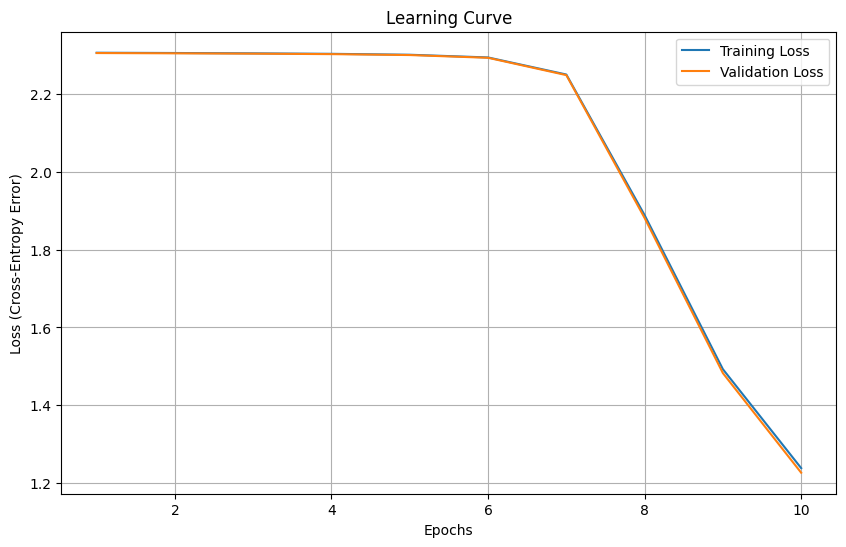

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Loading and preprocessing the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizing and flattening the training and test data
X_train = X_train.reshape(-1, 784).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 784).astype(np.float32) / 255.0

# One-hot encode the labels
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

# Splitting the training data into training and validation sets (80/20 split)
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(
    X_train, y_train_one_hot, test_size=0.2, random_state=0
)
y_train, y_val = train_test_split(y_train, test_size=0.2, random_state=0)

print("Data Preprocessing Complete.")
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")
print("-" * 30)

# GetMiniBatch class for stochastic gradient descent
class GetMiniBatch:
    """
    Iterator to get a mini-batch

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data
        y : The following form of ndarray, shape (n_samples, 1)
          Correct answer value
        batch_size : int
          Batch size
        seed : int
          NumPy random seed
    """

    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(int)

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

# Neural Network Classifier Class
class ScratchSimpleNeuralNetrowkClassifier:
    """
    Simple three-layer neural network classifier

    Parameters
    ----------
    verbose : bool
        If True, the learning process will be output.

    Attributes
    ----------
    W1 : numpy.ndarray, shape (n_features, n_nodes1)
        Weights for the first layer.
    B1 : numpy.ndarray, shape (n_nodes1,)
        Bias for the first layer.
    W2 : numpy.ndarray, shape (n_nodes1, n_nodes2)
        Weights for the second layer.
    B2 : numpy.ndarray, shape (n_nodes2,)
        Bias for the second layer.
    W3 : numpy.ndarray, shape (n_nodes2, n_output)
        Weights for the third layer.
    B3 : numpy.ndarray, shape (n_output,)
        Bias for the third layer.
    learning_rate : float
        The learning rate for weight updates.
    """

    def __init__(self, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, learning_rate=0.01, verbose=True):
        self.verbose = verbose
        self.learning_rate = learning_rate
        # Initializing weights and biases with a Gaussian distribution
        # Weights
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)
        # Biases are initialized to zeros
        self.B1 = np.zeros(n_nodes1)
        self.B2 = np.zeros(n_nodes2)
        self.B3 = np.zeros(n_output)

        if self.verbose:
            print("Model parameters initialized:")
            print(f"W1 shape: {self.W1.shape}")
            print(f"B1 shape: {self.B1.shape}")
            print(f"W2 shape: {self.W2.shape}")
            print(f"B2 shape: {self.B2.shape}")
            print(f"W3 shape: {self.W3.shape}")
            print(f"B3 shape: {self.B3.shape}")

    def _sigmoid(self, A):
        """
        Sigmoid activation function.
        f(A) = 1 / (1 + exp(-A))
        """
        return 1 / (1 + np.exp(-A))

    def _softmax(self, A):
        """
        Softmax activation function, with stability consideration.
        Z_k = exp(A_k) / sum(exp(A_i))
        """
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        return exp_A / np.sum(exp_A, axis=1, keepdims=True)

    def forward_propagation(self, X):
        """
        Performs forward propagation through the three-layer network.
        """
        # First layer
        A1 = X @ self.W1 + self.B1
        Z1 = self._sigmoid(A1)

        # Second layer
        A2 = Z1 @ self.W2 + self.B2
        Z2 = self._sigmoid(A2)

        # Third layer (output layer)
        A3 = Z2 @ self.W3 + self.B3
        Z3 = self._softmax(A3)

        return A1, Z1, A2, Z2, A3, Z3

    def _cross_entropy_error(self, Z3, y_true):
        """
        Calculates the cross-entropy error.
        """
        batch_size = Z3.shape[0]
        # Adding a small value to Z3 to avoid log(0)
        L = -np.sum(y_true * np.log(Z3 + 1e-7)) / batch_size
        return L

    def _back_propagation(self, X, y_true, A1, Z1, A2, Z2, A3, Z3):
        """
        Performs backpropagation to calculate and update gradients.
        """
        batch_size = X.shape[0]

        # Third layer (Output)
        dA3 = (Z3 - y_true) / batch_size

        dW3 = Z2.T @ dA3
        dB3 = np.sum(dA3, axis=0)
        dZ2 = dA3 @ self.W3.T

        # Second layer
        dA2 = dZ2 * self._sigmoid(A2) * (1 - self._sigmoid(A2))

        dW2 = Z1.T @ dA2
        dB2 = np.sum(dA2, axis=0)
        dZ1 = dA2 @ self.W2.T

        # First layer
        dA1 = dZ1 * self._sigmoid(A1) * (1 - self._sigmoid(A1))

        dW1 = X.T @ dA1
        dB1 = np.sum(dA1, axis=0)

        # Updating weights and biases
        self.W3 -= self.learning_rate * dW3
        self.B3 -= self.learning_rate * dB3
        self.W2 -= self.learning_rate * dW2
        self.B2 -= self.learning_rate * dB2
        self.W1 -= self.learning_rate * dW1
        self.B1 -= self.learning_rate * dB1

    def fit(self, X, y, X_val=None, y_val=None, epochs=10, batch_size=20):
        """
        Learn a neural network classifier.
        """
        self.loss_history = []
        self.val_loss_history = []

        for epoch in range(epochs):
            # Using the mini-batch iterator to get data
            get_mini_batch = GetMiniBatch(X, y, batch_size=batch_size)

            # Iterating through all mini-batches in the training set
            for mini_X_train, mini_y_train in get_mini_batch:
                # Forward propagation
                A1, Z1, A2, Z2, A3, Z3 = self.forward_propagation(mini_X_train)

                # Backpropagation to update weights and biases
                self._back_propagation(mini_X_train, mini_y_train, A1, Z1, A2, Z2, A3, Z3)

            # Calculating and storing loss at the end of each epoch
            _, _, _, _, _, Z3_train = self.forward_propagation(X)
            loss = self._cross_entropy_error(Z3_train, y)
            self.loss_history.append(loss)

            if X_val is not None and y_val is not None:
                _, _, _, _, _, Z3_val = self.forward_propagation(X_val)
                val_loss = self._cross_entropy_error(Z3_val, y_val)
                self.val_loss_history.append(val_loss)

            if self.verbose:
                print(f"Epoch {epoch + 1}/{epochs} - Training Loss: {loss:.4f}", end="")
                if X_val is not None and y_val is not None:
                    print(f" - Validation Loss: {val_loss:.4f}")
                else:
                    print()

    def predict(self, X):
        """
        Estimate using the neural network classifier.
        """
        _, _, _, _, _, Z3 = self.forward_propagation(X)
        y_pred = np.argmax(Z3, axis=1)
        return y_pred

# Main execution block to demonstrate training and evaluation
if __name__ == '__main__':
    # Initializing the neural network classifier
    nn_classifier = ScratchSimpleNeuralNetrowkClassifier(
        n_features=784,
        n_nodes1=400,
        n_nodes2=200,
        n_output=10,
        sigma=0.01,
        learning_rate=0.01,
        verbose=True
    )

    # Training the model using the fit method
    print("Starting training...")
    nn_classifier.fit(
        X_train,
        y_train_one_hot,
        X_val=X_val,
        y_val=y_val_one_hot,
        epochs=10,
        batch_size=20
    )

    # Making predictions on the test set
    y_pred_test = nn_classifier.predict(X_test)

    # Calculating the accuracy of the predictions
    accuracy = accuracy_score(y_test, y_pred_test)

    print("-" * 30)
    print(f"Final Test Accuracy: {accuracy:.4f}")

    # Plotting the learning curve
    print("\nPlotting the learning curve...")
    plt.figure(figsize=(10, 6))
    epochs_range = range(1, len(nn_classifier.loss_history) + 1)
    plt.plot(epochs_range, nn_classifier.loss_history, label='Training Loss')
    plt.plot(epochs_range, nn_classifier.val_loss_history, label='Validation Loss')
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (Cross-Entropy Error)')
    plt.legend()
    plt.grid(True)
    plt.show()

**8. Problem 8 (Advance Assignment) Confirmation of Misclassification**

Data Preprocessing Complete.
Training data shape: (48000, 784)
Validation data shape: (12000, 784)
Test data shape: (10000, 784)
------------------------------
Model parameters initialized:
W1 shape: (784, 400)
B1 shape: (400,)
W2 shape: (400, 200)
B2 shape: (200,)
W3 shape: (200, 10)
B3 shape: (10,)
Starting training...
Epoch 1/10 - Training Loss: 2.3068 - Validation Loss: 2.3060
Epoch 2/10 - Training Loss: 2.3061 - Validation Loss: 2.3053
Epoch 3/10 - Training Loss: 2.3053 - Validation Loss: 2.3045
Epoch 4/10 - Training Loss: 2.3040 - Validation Loss: 2.3032
Epoch 5/10 - Training Loss: 2.3017 - Validation Loss: 2.3009
Epoch 6/10 - Training Loss: 2.2947 - Validation Loss: 2.2938
Epoch 7/10 - Training Loss: 2.2508 - Validation Loss: 2.2492
Epoch 8/10 - Training Loss: 1.8889 - Validation Loss: 1.8815
Epoch 9/10 - Training Loss: 1.4924 - Validation Loss: 1.4823
Epoch 10/10 - Training Loss: 1.2379 - Validation Loss: 1.2260
------------------------------
Final Test Accuracy: 0.5383

Plotti

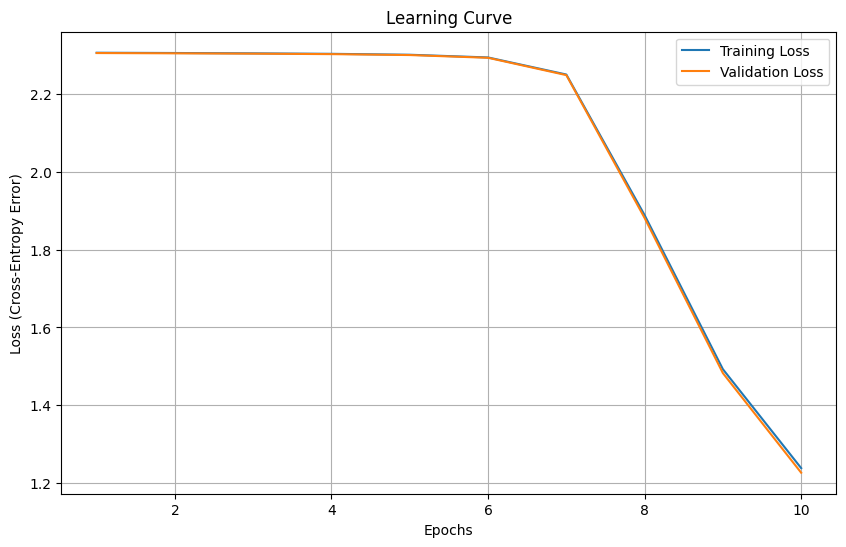


Identifying and displaying misclassified images...


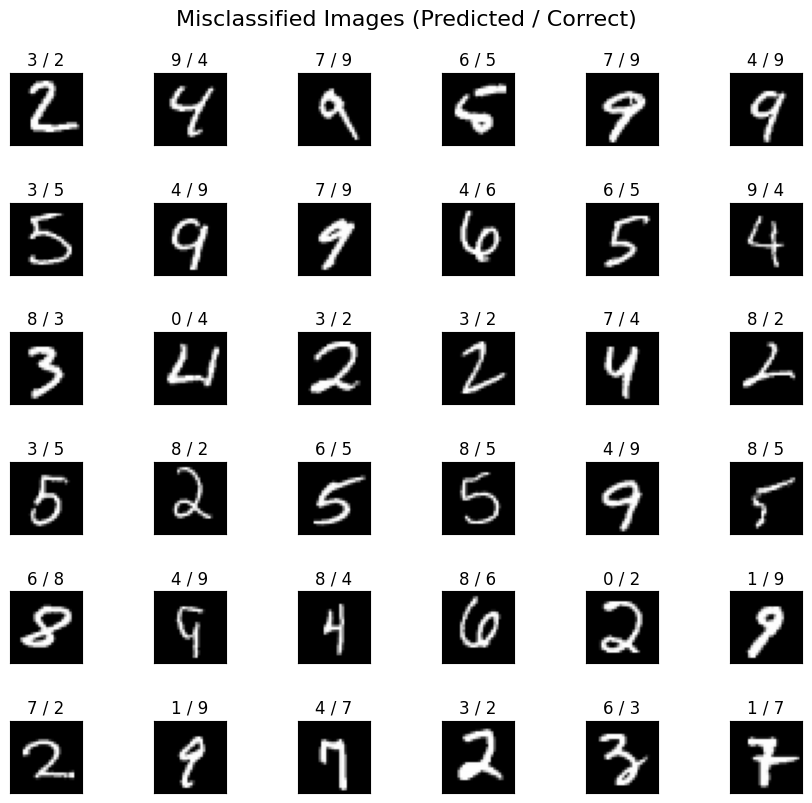

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Loading and preprocessing the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizing and flattening the training and test data
X_train = X_train.reshape(-1, 784).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 784).astype(np.float32) / 255.0

# One-hot encode the labels
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

# Splitting the training data into training and validation sets (80/20 split)
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(
    X_train, y_train_one_hot, test_size=0.2, random_state=0
)
y_train, y_val = train_test_split(y_train, test_size=0.2, random_state=0)

print("Data Preprocessing Complete.")
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")
print("-" * 30)

# GetMiniBatch class for stochastic gradient descent
class GetMiniBatch:
    """
    Iterator to get a mini-batch

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data
        y : The following form of ndarray, shape (n_samples, 1)
          Correct answer value
        batch_size : int
          Batch size
        seed : int
          NumPy random seed
    """

    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(int)

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

# Neural Network Classifier Class
class ScratchSimpleNeuralNetrowkClassifier:
    """
    Simple three-layer neural network classifier

    Parameters
    ----------
    verbose : bool
        If True, the learning process will be output.

    Attributes
    ----------
    W1 : numpy.ndarray, shape (n_features, n_nodes1)
        Weights for the first layer.
    B1 : numpy.ndarray, shape (n_nodes1,)
        Bias for the first layer.
    W2 : numpy.ndarray, shape (n_nodes1, n_nodes2)
        Weights for the second layer.
    B2 : numpy.ndarray, shape (n_nodes2,)
        Bias for the second layer.
    W3 : numpy.ndarray, shape (n_nodes2, n_output)
        Weights for the third layer.
    B3 : numpy.ndarray, shape (n_output,)
        Bias for the third layer.
    learning_rate : float
        The learning rate for weight updates.
    """

    def __init__(self, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, learning_rate=0.01, verbose=True):
        self.verbose = verbose
        self.learning_rate = learning_rate
        # Initializing weights and biases with a Gaussian distribution
        # Weights
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)
        # Biases are initialized to zeros
        self.B1 = np.zeros(n_nodes1)
        self.B2 = np.zeros(n_nodes2)
        self.B3 = np.zeros(n_output)

        if self.verbose:
            print("Model parameters initialized:")
            print(f"W1 shape: {self.W1.shape}")
            print(f"B1 shape: {self.B1.shape}")
            print(f"W2 shape: {self.W2.shape}")
            print(f"B2 shape: {self.B2.shape}")
            print(f"W3 shape: {self.W3.shape}")
            print(f"B3 shape: {self.B3.shape}")

    def _sigmoid(self, A):
        """
        Sigmoid activation function.
        f(A) = 1 / (1 + exp(-A))
        """
        return 1 / (1 + np.exp(-A))

    def _softmax(self, A):
        """
        Softmax activation function, with stability consideration.
        Z_k = exp(A_k) / sum(exp(A_i))
        """
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        return exp_A / np.sum(exp_A, axis=1, keepdims=True)

    def forward_propagation(self, X):
        """
        Performs forward propagation through the three-layer network.
        """
        # First layer
        A1 = X @ self.W1 + self.B1
        Z1 = self._sigmoid(A1)

        # Second layer
        A2 = Z1 @ self.W2 + self.B2
        Z2 = self._sigmoid(A2)

        # Third layer (output layer)
        A3 = Z2 @ self.W3 + self.B3
        Z3 = self._softmax(A3)

        return A1, Z1, A2, Z2, A3, Z3

    def _cross_entropy_error(self, Z3, y_true):
        """
        Calculates the cross-entropy error.
        """
        batch_size = Z3.shape[0]
        # Adding a small value to Z3 to avoid log(0)
        L = -np.sum(y_true * np.log(Z3 + 1e-7)) / batch_size
        return L

    def _back_propagation(self, X, y_true, A1, Z1, A2, Z2, A3, Z3):
        """
        Performs backpropagation to calculate and update gradients.
        """
        batch_size = X.shape[0]

        # Third layer (Output)
        dA3 = (Z3 - y_true) / batch_size

        dW3 = Z2.T @ dA3
        dB3 = np.sum(dA3, axis=0)
        dZ2 = dA3 @ self.W3.T

        # Second layer
        dA2 = dZ2 * self._sigmoid(A2) * (1 - self._sigmoid(A2))

        dW2 = Z1.T @ dA2
        dB2 = np.sum(dA2, axis=0)
        dZ1 = dA2 @ self.W2.T

        # First layer
        dA1 = dZ1 * self._sigmoid(A1) * (1 - self._sigmoid(A1))

        dW1 = X.T @ dA1
        dB1 = np.sum(dA1, axis=0)

        # Updating weights and biases
        self.W3 -= self.learning_rate * dW3
        self.B3 -= self.learning_rate * dB3
        self.W2 -= self.learning_rate * dW2
        self.B2 -= self.learning_rate * dB2
        self.W1 -= self.learning_rate * dW1
        self.B1 -= self.learning_rate * dB1

    def fit(self, X, y, X_val=None, y_val=None, epochs=10, batch_size=20):
        """
        Learn a neural network classifier.
        """
        self.loss_history = []
        self.val_loss_history = []
        self.fit_epochs = epochs # Store the number of epochs for plotting

        for epoch in range(epochs):
            # Using the mini-batch iterator to get data
            get_mini_batch = GetMiniBatch(X, y, batch_size=batch_size)

            # Iterating through all mini-batches in the training set
            for mini_X_train, mini_y_train in get_mini_batch:
                # Forward propagation
                A1, Z1, A2, Z2, A3, Z3 = self.forward_propagation(mini_X_train)

                # Backpropagation to update weights and biases
                self._back_propagation(mini_X_train, mini_y_train, A1, Z1, A2, Z2, A3, Z3)

            # Calculating and storing loss at the end of each epoch
            _, _, _, _, _, Z3_train = self.forward_propagation(X)
            loss = self._cross_entropy_error(Z3_train, y)
            self.loss_history.append(loss)

            if X_val is not None and y_val is not None:
                _, _, _, _, _, Z3_val = self.forward_propagation(X_val)
                val_loss = self._cross_entropy_error(Z3_val, y_val)
                self.val_loss_history.append(val_loss)

            if self.verbose:
                print(f"Epoch {epoch + 1}/{epochs} - Training Loss: {loss:.4f}", end="")
                if X_val is not None and y_val is not None:
                    print(f" - Validation Loss: {val_loss:.4f}")
                else:
                    print()

    def predict(self, X):
        """
        Estimate using the neural network classifier.
        """
        _, _, _, _, _, Z3 = self.forward_propagation(X)
        y_pred = np.argmax(Z3, axis=1)
        return y_pred

# Main execution block to demonstrate training and evaluation
if __name__ == '__main__':
    # Initialize the neural network classifier
    nn_classifier = ScratchSimpleNeuralNetrowkClassifier(
        n_features=784,
        n_nodes1=400,
        n_nodes2=200,
        n_output=10,
        sigma=0.01,
        learning_rate=0.01,
        verbose=True
    )

    # Training the model using the fit method
    print("Starting training...")
    nn_classifier.fit(
        X_train,
        y_train_one_hot,
        X_val=X_val,
        y_val=y_val_one_hot,
        epochs=10,
        batch_size=20
    )

    # Making predictions on the test set
    y_pred_test = nn_classifier.predict(X_test)

    # Calculating the accuracy of the predictions
    accuracy = accuracy_score(y_test, y_pred_test)

    print("-" * 30)
    print(f"Final Test Accuracy: {accuracy:.4f}")

    # Plotting the learning curve
    print("\nPlotting the learning curve...")
    plt.figure(figsize=(10, 6))
    epochs_range = range(1, len(nn_classifier.loss_history) + 1)
    plt.plot(epochs_range, nn_classifier.loss_history, label='Training Loss')
    plt.plot(epochs_range, nn_classifier.val_loss_history, label='Validation Loss')
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (Cross-Entropy Error)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Problem 8: Identify and display misclassified images
    print("\nIdentifying and displaying misclassified images...")

    # Finding indices where the prediction does not match the true label
    misclassified_indices = np.where(y_pred_test != y_test)[0].astype(int)

    # Determining how many images to display (up to 36)
    num_to_display = min(36, len(misclassified_indices))

    # Creating the plot
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle('Misclassified Images (Predicted / Correct)', fontsize=16)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=0.9, hspace=0.8, wspace=0.8)

    for i in range(num_to_display):
        ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
        misclassified_index = misclassified_indices[i]
        predicted_label = y_pred_test[misclassified_index]
        true_label = y_test[misclassified_index]
        ax.set_title(f"{predicted_label} / {true_label}")
        ax.imshow(X_test.reshape(-1, 28, 28)[misclassified_index], cmap="gray")

    plt.show()